In [1]:
import torch
import torch.nn.functional as F
import numpy as np
import json
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import skimage.transform
import argparse
import imageio
from imageio import imread
from cv2 import resize as imresize
from PIL import Image
import os

from baseline_lstm_inference import caption_image_beam_search, visualize_att


In [2]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")


In [3]:
model_path = 'checkpoints/lstm_model_checkpoints/BEST_checkpoint_coco_5_cap_per_img_5_min_word_freq.pth.tar'
word_map_path = 'checkpoints/WORDMAP_coco_5_cap_per_img_5_min_word_freq.json'


## Loading the model and word map

In [4]:
# Load model
checkpoint = torch.load(model_path, map_location=str(device))

decoder = checkpoint['decoder']
decoder = decoder.to(device)
decoder.eval()
    
encoder = checkpoint['encoder']
encoder = encoder.to(device)
encoder.eval()

with open(word_map_path, 'r') as j:
    word_map = json.load(j)

rev_word_map = {v: k for k, v in word_map.items()}  # ix2word


## Inference

In [5]:
image_path = 'example_images/cat.png'


In [6]:
with torch.inference_mode():
    seq, alphas = caption_image_beam_search(encoder, decoder, image_path, word_map)
    alphas = torch.FloatTensor(alphas)
    
# converting into a normal sentence
caption = ''
for s in seq[1:-1]:
    caption += rev_word_map[s] + ' '
print(caption)


a couple of cats laying on top of a bed 


## Attention

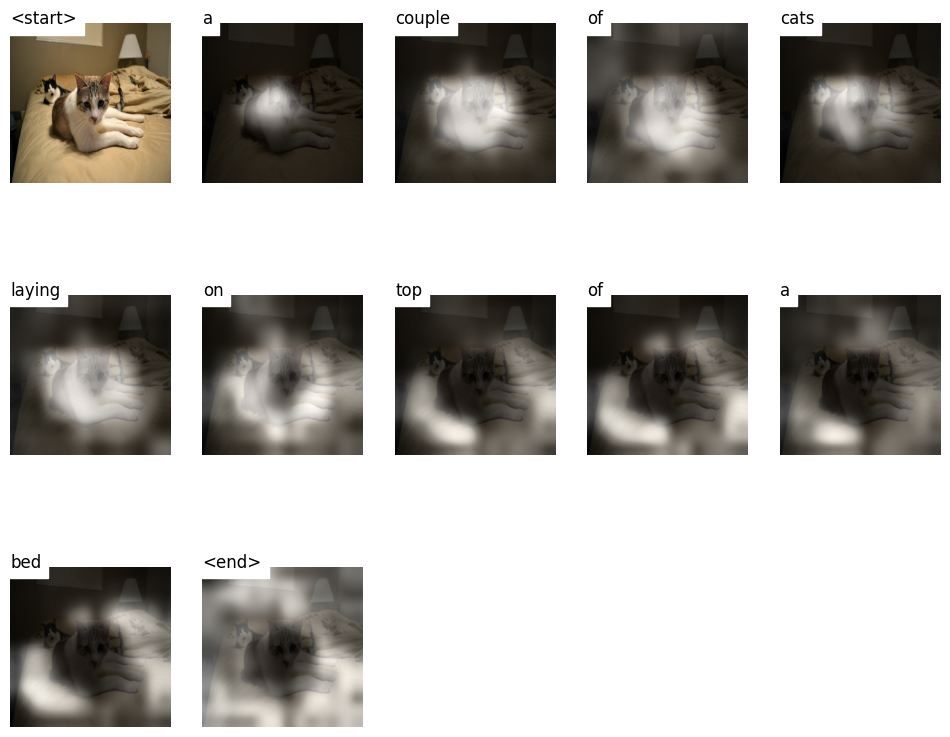

In [7]:
# Visualize caption and attention of best sequence
visualize_att(image_path, seq, alphas, rev_word_map)
